# **MARKET BASKET ANALYSIS**

## **Business Understanding**

### *Context*

E-commerce merupakan sebuah media untuk melakukan jual-beli barang yang masif. Hal ini dikarenakan cukup dengan mengakses sebuah situs maka pembeli dapat memperoleh barangnya dengan mudah, cepat, dan relatif lebih murah dibandingkan dengan membeli secara offline. Untuk penjual pun juga dapat menjual barangnya secara masif tanpa perlu mengeluarkan biaya yang berlebih, sehingga dapat menekan beberapa cost yang dirasa besar.

### *Problem Statement*

Namun pada praktiknya, terdapat kecenderungan pembeli lupa untuk membeli beberapa barang yang diperlukan atau sebenarnya perlu namun ia tidak ingat. Hal ini secara langsung membuat pembeli harus melakukan pembelian lagi di kemudian hari dengan menggunakan keyword yang mungkin cukup menyulitkan pembeli. Selain itu pembeli juga terdapat kesulitan untuk menentukan barang dengan kualitas yang bagus. Selain itu dengan kondisi seperti ini, tentu akan menurunkan jumlah sales dan revenue yang diperoleh oleh e-commerce maupun penjual.

### *Goals*

Untuk memudahkan pembeli serta meningkatkan pengalaman pembeli saat berbelanja dan meningkatkan revenue bagi penjual dan e-commerce, maka akan dibuat sebuah market basket analysis yang akan merekomendasikan sebuah barang kepada konsumen berdasarkan barang yang sudah dimasukkan ke keranjang (product category) dan berdasarkan ratingnya.

### *Insight*
Key question: 
- barang mana dengan penjualan tertinggi dan terendah
    - Alasan kenapa penjualannya tinggi/rendah berdasarkan karakteristik barang (misal: berdasarkan rating, harga, bukan jenis barang sehari-hari, besar barang)
- analysis dari sisi sales
    - frekuensi pembelian
    - frekuensi jenis pembayaran
    - rata-rata pembelian (per quarter)
    - order status
- analysis dari segi geografi
    - kota mana yang memiliki pembelian tertinggi
- analysis dari segi logistik
    - perbandingan antara estimasi delivery dengan realtime delivery

## **Data Understanding**

Untuk menunjang goal yang telah ditetapkan, akan digunakan beberapa dataset sebagai berikut:
1. order rewiews dataset
2. order payment dataset
3. products dataset
4. order items dataset
5. orders dataset
6. geolocation dataset

In [103]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statistics

In [52]:
#Load dataset

order_reviews = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_order_reviews_dataset.csv')
order_payment = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_order_payments_dataset.csv')
product = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_products_dataset.csv')
order_item = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_order_items_dataset.csv')
orders = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_orders_dataset.csv')
geo = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_geolocation_dataset.csv')
cust = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_customers_dataset.csv')
product_categ = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/product_category_name_translation.csv')
sellers = pd.read_csv('/Purwadhika/Final Project/Brazilian E-Commerce/Dataset/olist_sellers_dataset.csv')


In [40]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [41]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [43]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [44]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [47]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [50]:
product_categ.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
orders[orders['order_status']=='unavailable']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [53]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


dataset yang tersedia terpisah dalam beberapa tabel, untuk memudahkan pengerjaan selanjutnya seluruh tabel tersebut akan digabungkan ke dalam satu tabel. Untuk menggabungkan tabel-tabel tersebut, berikut adalah hubungan antar dataset-dataset tersebut.

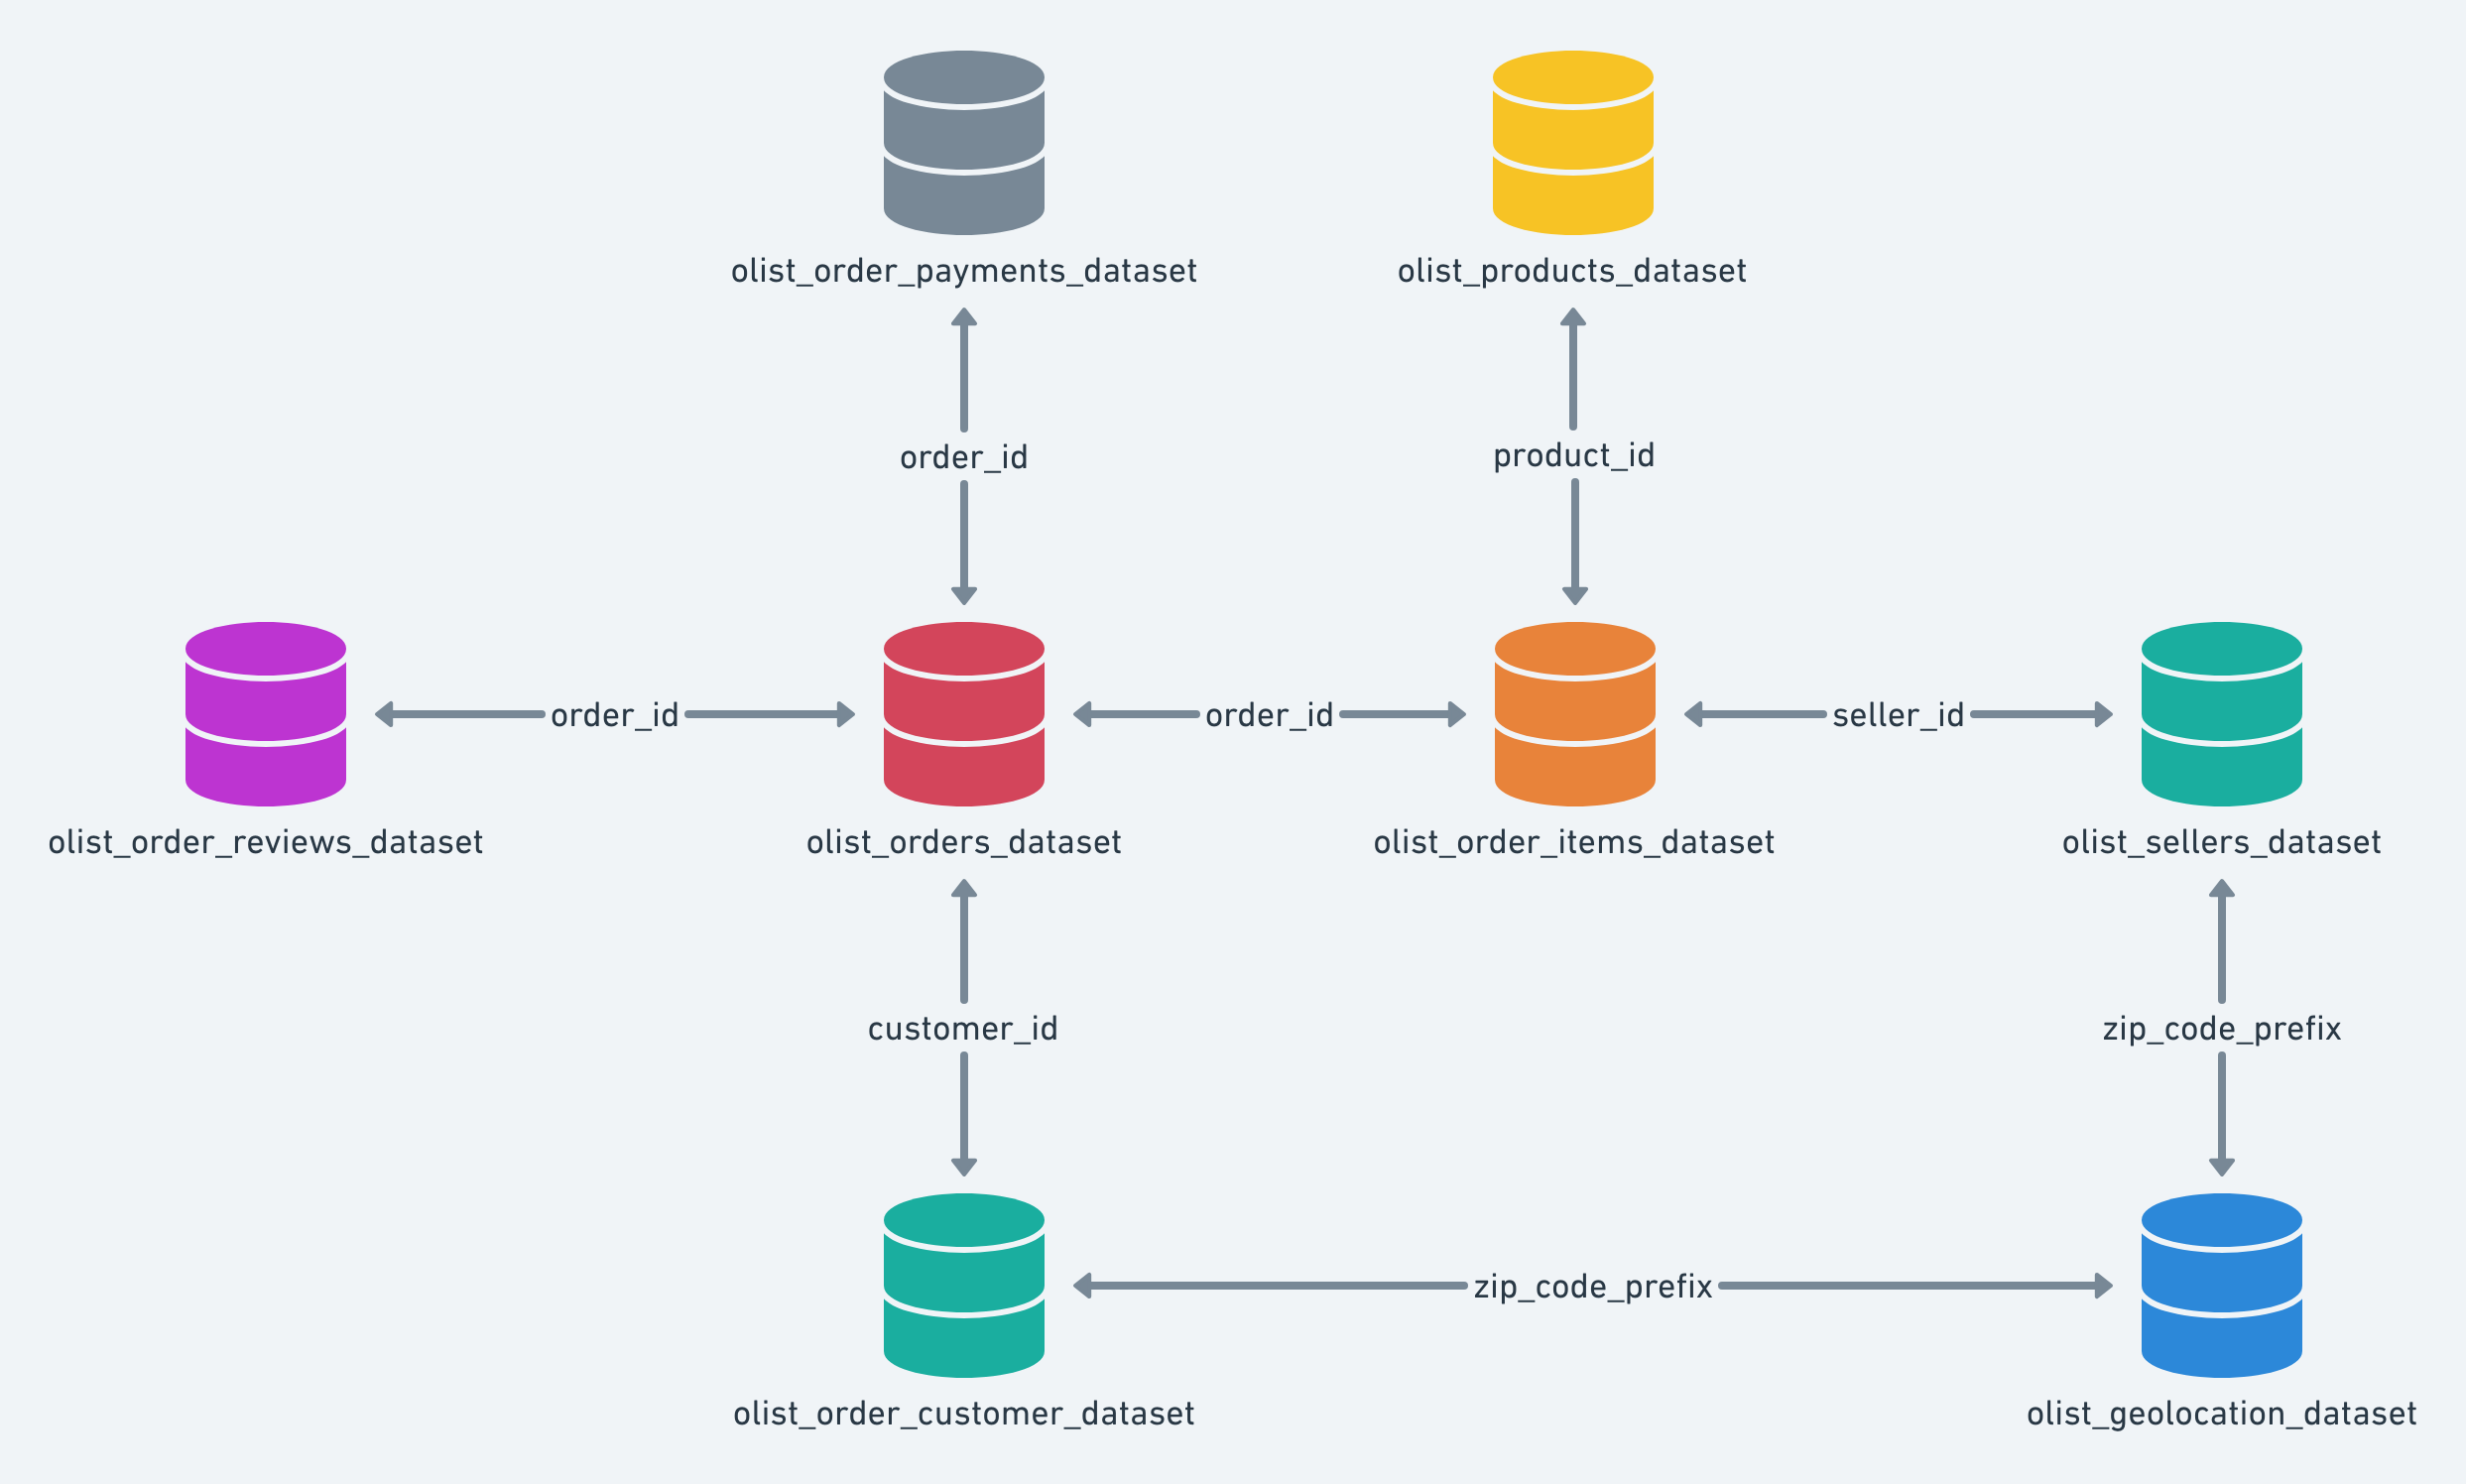

Berdasarkan diagram di atas, dapat disimpulkan penggabungan yang akan dilakukan yaitu:
1. Menggabungkan 'olist_order_reviews_dataset', 'olist_order_payments_dataset', 'olist_order_items_dataset', dan 'olist_orders_dataset' menggunakan kolom order_id
2. Menggabungkan 'olist_products_dataset' dengan 'olist_order_items_dataset' menggunakan kolom product_id

In [32]:
from translate import Translator
translator= Translator(to_lang="en")

In [55]:
#translate product category
product['translated_cat'] = product['product_category_name'].apply(lambda x: translator.translate(x))

In [56]:
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translated_cat
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,informatica_acessorios


In [57]:
order_reviews['has_comment'] = order_reviews['review_comment_message'].apply(lambda x: 1 if pd.notna(x) else 0)

In [60]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,has_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1


In [54]:
# Merge

df= pd.merge(cust, orders, on="customer_id", how='inner')
df= df.merge(order_reviews, on="order_id", how='inner')
df= df.merge(order_item, on="order_id", how='inner')
df= df.merge(product, on="product_id", how='inner')
df= df.merge(order_payment, on="order_id", how='inner')
df= df.merge(sellers, on='seller_id', how='inner')
df= df.merge(product_categ, on='product_category_name', how='inner')
df.shape

(115609, 40)

Dataset ini memuat 40 kolom mengenai beragam informasi terkait setiap order yang telah dilakukan di ecommerce di Brazil tahun 2017-2018 (MASIH ESTIMASI).

(NANTINYA DIBUAT TABEL TENTANG DESKRIPSI MASING-MASING KOLOM)

In [61]:
df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [62]:
df.dropna(inplace=True)

In [125]:
category_dict = {
    'Clothing & Apparel': ['fashion_shoes', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashio_female_clothing', 'fashion_underwear_beach'],
    'Baby & Children': ['baby','fashion_childrens_clothes','toys', 'diapers_and_hygiene'],
    'Electronics & Gadgets': ['computers_accessories', 'watches_gifts',  'electronics', 'audio', 'tablets_printing_image', 'computers', 'fixed_telephony', 'air_conditioning'],
    'Entertainment': ['musical_instruments','cds_dvds_musicals','consoles_games', 'music','cool_stuff', 'cine_photo', 'dvds_blu_ray'],
    'Seasonal Stuff': ['party_supplies', 'christmas_supplies'],
    'Health and Beauty': ['perfumery', 'health_beauty'],
    'Stationery': ['stationery','industry_commerce_and_business', 'books_general_interest', 'books_technical', 'books_imported', 'arts_and_craftmanship', 'art'],
    'Tools': ['costruction_tools_garden', 'garden_tools', 'costruction_tools_tools', 'construction_tools_lights', 'construction_tools_safety', 'construction_tools_construction','auto'],
    'Food and Beverages': ['food', 'drinks', 'food_drink', 'agro_industry_and_commerce', 'la_cuisine'],
    'Furniture': ['housewares', 'bed_bath_table', 'furniture_decor', 'flowers', 'office_furniture', 'furniture_bedroom', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'home_comfort_2', 'kitchen_dining_laundry_garden_furniture', 'home_confort',  'home_construction', 'home_appliances', 'home_appliances_2', 'small_appliances','small_appliances_home_oven_and_coffee'],
    'Sports Products': ['sports_leisure', 'fashion_sport'],
    'Other': ['pet_shop', 'security_and_services', 'luggage_accessories', 'signaling_and_security', 'market_place']
}

# Function to append a suffix to each subcategory in a given category
def append_suffix_to_category(category, suffix):
    return list(map(lambda subcategory: subcategory + suffix, category_dict[category]))

# Apply the function to specific categories
suffixes = {'Clothing & Apparel': '_clothing', 'Baby & Children': '_baby', 'Electronics & Gadgets': '_electronic' , 'Entertainment': '_entertainment', 'Seasonal Stuff':'_seasonal', 'Health and Beauty': '_health', 'Stationery': '_stationery', 'Tools': '_tools','Food and Beverages': '_fnb', 'Furniture': '_furniture', 'Sports Products': '_sport'}

for category, suffix in suffixes.items():
    category_dict[category] = append_suffix_to_category(category, suffix)

# Create DataFrame from the modified category dictionary
data = []

for category, subcategories in category_dict.items():
    for subcategory in subcategories:
        data.append({'Category': category, 'product_category_name_english': subcategory})

df_categories = pd.DataFrame(data)

In [124]:
df_categories.head(10)

,Category,product_category_name_english
0,Clothing & Apparel,fashion_shoes_clothing
1,Clothing & Apparel,fashion_bags_accessories_clothing
2,Clothing & Apparel,baby_clothing
3,Clothing & Apparel,fashion_male_clothing_clothing
4,Clothing & Apparel,fashio_female_clothing_clothing
5,Clothing & Apparel,fashion_underwear_beach_clothing
6,Clothing & Apparel,fashion_childrens_clothes_clothing
7,Electronics & Gadgets,computers_accessories_electronic
8,Electronics & Gadgets,watches_gifts_electronic
9,Electronics & Gadgets,musical_instruments_electronic


In [78]:
df = df.merge(df_categories, on='product_category_name_english', how='inner')
df = df.drop(columns='product_category_name')

In [79]:
df.rename(columns={'product_category_name_english' : 'subcategory'}, inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108615 entries, 0 to 108614
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108615 non-null  object 
 1   customer_unique_id             108615 non-null  object 
 2   customer_zip_code_prefix       108615 non-null  int64  
 3   customer_city                  108615 non-null  object 
 4   customer_state                 108615 non-null  object 
 5   order_id                       108615 non-null  object 
 6   order_status                   108615 non-null  object 
 7   order_purchase_timestamp       108615 non-null  object 
 8   order_approved_at              108615 non-null  object 
 9   order_delivered_carrier_date   108615 non-null  object 
 10  order_delivered_customer_date  108615 non-null  object 
 11  order_estimated_delivery_date  108615 non-null  object 
 12  review_id                     

In [81]:
df.to_csv('1. merge.csv', index=False)

In [84]:
# Convert Datetime
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']).dt.strftime('%Y-%m-%d')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.strftime('%Y-%m-%d')

In [85]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [86]:
df['delivery_time_days']=df['order_delivered_customer_date']-df['order_approved_at']
df['delivery_time_days'] = df['delivery_time_days'].dt.days
df['delivery_time_days'].head()

0     9
1    18
2    18
3    18
4    24
Name: delivery_time_days, dtype: int32

In [88]:
# Convert Data type
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

#menambahkan order_day agar jumlah order bisa dikelompokan per hari
df['order_day'] = df['order_purchase_timestamp'].dt.day_name()
#menambah order_day_num untuk menunjukkan angka hari setiap pekan. berguna untuk mengurutkan
df['order_day_num'] = df['order_purchase_timestamp'].dt.day_of_week
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days,order_day,order_day_num
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,...,2,146.87,8577,itaquaquecetuba,SP,office_furniture,Furniture,9,Tuesday,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,SP,office_furniture,Furniture,18,Thursday,3
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,SP,office_furniture,Furniture,18,Thursday,3
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08,2017-05-19 20:16:31,...,7,140.61,8577,itaquaquecetuba,SP,office_furniture,Furniture,18,Sunday,6
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04,2018-02-19 18:21:47,...,10,137.58,8577,itaquaquecetuba,SP,office_furniture,Furniture,24,Saturday,5


In [89]:
df = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_approved_at', 'order_id', 'delivery_time_days', 'seller_id', 'seller_state', 'Category', 
        'subcategory', 'payment_type', 'payment_installments','price', 'freight_value', 'payment_value', 'order_day', 'review_score']]

In [90]:
df.head()

,customer_unique_id,customer_city,customer_state,order_approved_at,order_id,delivery_time_days,seller_id,seller_state,Category,subcategory,payment_type,payment_installments,price,freight_value,payment_value,order_day,review_score
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,2017-05-16,00e7ee1b050b8499577073aeb2a297a1,9,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,2,124.99,21.88,146.87,Tuesday,4
1,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,2017-11-10,c1d2b34febe9cd269e378117d6681172,18,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,1,112.99,24.90,275.79,Thursday,1
2,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,2017-11-10,c1d2b34febe9cd269e378117d6681172,18,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,1,112.99,24.90,275.79,Thursday,1
3,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,2017-05-08,b1a5d5365d330d10485e0203d54ab9e8,18,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,7,124.99,15.62,140.61,Sunday,3
4,23397e992b09769faf5e66f9e171a241,mage,RJ,2018-02-04,2e604b3614664aa66867856dba7e61b7,24,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,10,106.99,30.59,137.58,Saturday,4


In [91]:
df.duplicated().sum()

11598

In [92]:
df = df[~df.duplicated()]

In [93]:
df_recency = df.groupby(by='customer_unique_id',
                        as_index=False)['order_approved_at'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']

df_recency['LastPurchaseDate'] = pd.to_datetime(df_recency['LastPurchaseDate'])

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,146
4,00053a61a98854899e70ed204dd4bafe,2018-02-28,182


In [94]:
frequency_df = df.groupby(
    by=['customer_unique_id'], as_index=False)['order_id'].nunique()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0004bd2a26a76fe21f786e4fbd80607f,1
4,00053a61a98854899e70ed204dd4bafe,1


In [95]:
frequency_df.Frequency.value_counts()/len(frequency_df)*100

Frequency
1     97.051266
2      2.716901
3      0.182726
4      0.029693
5      0.010278
6      0.003426
7      0.003426
9      0.001142
14     0.001142
Name: count, dtype: float64

In [96]:
df['payment_value'] = df['price'] + df['freight_value']
df['Total'] = df['payment_value']
monetary_df = df.groupby(by='customer_unique_id', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0004bd2a26a76fe21f786e4fbd80607f,166.98
4,00053a61a98854899e70ed204dd4bafe,209.59


In [97]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
4,00053a61a98854899e70ed204dd4bafe,182,1,209.59


In [98]:
rfm_df.rename(columns={'CustomerName': 'customer_unique_id'}, inplace=True)

In [109]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False, method='dense')
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True, method='dense')
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True, method='dense')

In [100]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (3*IQR)
    upper = Q3 + (3*IQR)
    return Q1, Q3, IQR, lower, upper

In [101]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,87563.000000,87563.000000,87563.000000
mean,235.380024,1.032742,162.560895
std,152.513314,0.206093,226.784541
min,0.000000,1.000000,10.070000
25%,112.000000,1.000000,63.230000
50%,216.000000,1.000000,105.890000
75%,344.000000,1.000000,177.690000
max,694.000000,14.000000,8618.760000


In [110]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,498.0,1.0,12458.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,495.0,1.0,619.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,75.0,1.0,6727.0
3,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,466.0,1.0,14662.0
4,00053a61a98854899e70ed204dd4bafe,182,1,209.59,430.0,1.0,17901.0
...,...,...,...,...,...,...,...
87558,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,165.0,1.0,29276.0
87559,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,350.0,1.0,6556.0
87560,ffff371b4d645b6ecea244b27531430a,568,1,112.46,44.0,1.0,9520.0
87561,ffff5962728ec6157033ef9805bacc48,119,1,133.69,490.0,1.0,11685.0


In [126]:
#modus data
mode_recency = statistics.mode(rfm_df['Recency'])
mode_frequency = statistics.mode(rfm_df['Frequency'])
mode_monetary = statistics.mode(rfm_df['Monetary'])

#menghitung range
#range=max-min
range_recency = max(rfm_df['Recency'])-min(rfm_df['Recency'])
range_frequency = max(rfm_df['Frequency'])-min(rfm_df['Frequency'])
range_monetary = max(rfm_df['Monetary'])-min(rfm_df['Monetary'])

#menghitung variance
var_recency = statistics.variance(rfm_df['Recency'])
var_frequency = statistics.variance(rfm_df['Frequency'])
var_monetary = statistics.variance(rfm_df['Monetary'])

#menghitung coefficient of variation
#cov=stdev/mean
cov_recency = np.std(rfm_df['Recency'])/np.mean(rfm_df['Recency'])
cov_frequency = np.std(rfm_df['Frequency'])/np.mean(rfm_df['Frequency'])
cov_monetary = np.std(rfm_df['Monetary'])/np.mean(rfm_df['Monetary'])

#menghitung skewness
skewness = rfm_df.skew()
#membuat skewness menjadi data frame degan nama kolom variable dan skewness
#urutan row: delivery_time, payment_installments, payment_value
skewness = pd.DataFrame(skewness)
skewness.reset_index(inplace=True)
skewness.columns=['varible','skewness']

#menghitung kurtosis
df_kurtosis = rfm_df.kurtosis()
#membuat kurtosis menjadi data frame degan nama kolom variable dan kurtosis
#urutan row: delivery_time, payment_installments, payment_value
df_kurtosis = pd.DataFrame(df_kurtosis)
df_kurtosis.reset_index(inplace=True)
df_kurtosis.columns=['variable','kurtosis']

#mengumpulkan parameter descriptive statistics dalam sebuah list
des_parameter = [(mode_recency, mode_frequency, mode_monetary),
                 (range_recency,range_frequency,range_monetary),
                 (var_recency, var_frequency, cov_monetary),
                 (cov_recency,cov_frequency,cov_monetary),
                 (skewness['skewness'].loc[0],skewness['skewness'].loc[1],skewness['skewness'].loc[2]),
                 (df_kurtosis['kurtosis'].loc[0], df_kurtosis['kurtosis'].loc[1], df_kurtosis['kurtosis'].loc[2])]

#membuat dataframe descriptive statistics kedua
df_des2 = pd.DataFrame(des_parameter,
                      index=('mode','range','variance','coefficient_of_variant','skewness','kurtosis'),
                      columns=('Recency', 'Frequency','Monetary'))
df_des2

TypeError: could not convert string to float: '0000366f3b9a7992bf8c76cfdf3221e2'